In [87]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [88]:
iris = load_iris()

In [89]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [90]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [91]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

In [92]:
# оставим только 2 класса Iris-Versicolour и Iris-Virginica
data = data.loc[((data['class'] == 1) | (data['class'] == 2))]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [93]:
#разделим данные на передаваемую матрицу и целевую переменную
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)' ]]
y = data['class']

In [94]:
lr = LogisticRegression()

In [95]:
# делим данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [96]:
# обучаем модель на тренировочной выборке
lr.fit(X_train, y_train)

LogisticRegression()

In [97]:
# посмотрим кол-во верных ответов выборки
lr.score(X_test, y_test)

0.9333333333333333

In [98]:
lr.score(X_train, y_train)

0.9714285714285714

Наша модель очень хорошо определяет класс

In [99]:
y_pred = lr.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2])

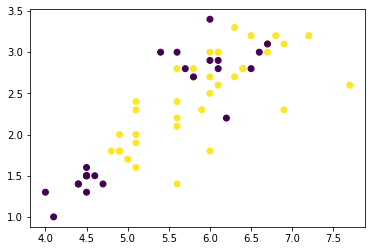

In [100]:
import matplotlib.pyplot as plt
X = plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred)
y = plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_pred)
plt.show()

#### метод градиентного спуска

In [101]:
import numpy as np

In [110]:
y = data['class']
y1 = y.to_numpy()
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
a = 2
b = 25
sigma = 0.5

x = y1                      
y = a * x + b + sigma * np.random.randn(x.shape[0])

Text(0, 0.5, 'Y')

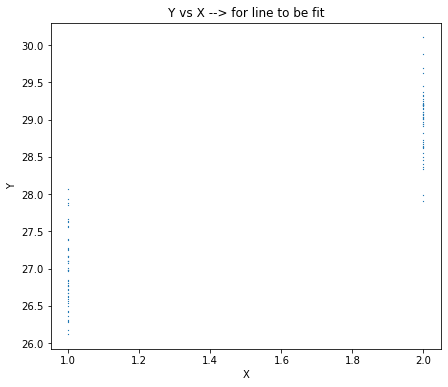

In [119]:
plt.figure(figsize = [7,6])
plt.scatter(x, y, marker='x', s=0.1)
plt.title('Y vs X --> for line to be fit')
plt.xlabel('X'); plt.ylabel('Y')

In [120]:
def compute_loss(a_est, b_est):
    return np.mean(np.square(y - (a_est * x + b_est)),2)

In [122]:
a_explore_range = 20
a_explore_step = 0.1

b_explore_range = 200
b_explore_step = 1


a_est_range = np.arange(a - a_explore_range, a + a_explore_range, a_explore_step)
b_est_range = np.arange(b - b_explore_range, b + b_explore_range, b_explore_step)

bgrid, agrid = np.meshgrid(b_est_range, a_est_range)

size_x = np.int(a_explore_range / a_explore_step * 2)
size_y = np.int(b_explore_range / b_explore_step * 2)
agrid_tiled = np.tile(np.reshape(agrid, [size_x, size_y, 1]), [1,1,x.shape[0]])
bgrid_tiled = np.tile(np.reshape(bgrid, [size_x, size_y,1]), [1,1,x.shape[0]])

loss_full_grid = compute_loss(agrid_tiled, bgrid_tiled)

Text(0.5, 0.92, 'loss function')

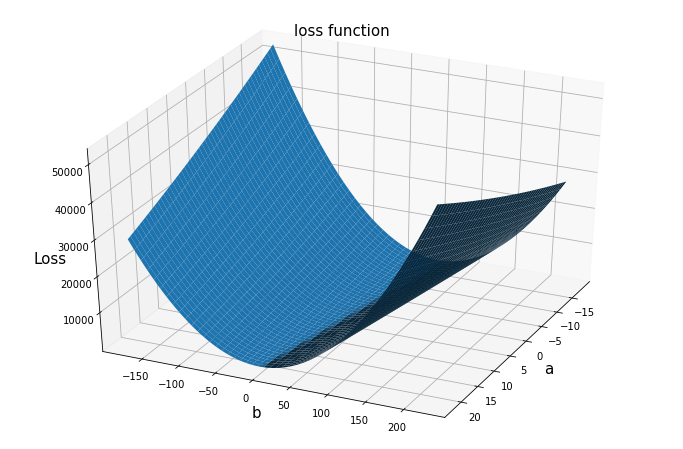

In [124]:
azimuth_angle = 25.
elevation_angle = 35

fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = elevation_angle, azim = azimuth_angle)
ax.plot_surface(agrid, bgrid, loss_full_grid)
ax.set_xlabel('a', fontsize=15);  ax.set_ylabel('b', fontsize=15)
ax.set_zlabel('Loss', fontsize=15)
ax.set_title('loss function', fontsize=15)

In [137]:
EPOCHS = 10
LEARNING_RATE = 0.0001
sigma = 0.25
X = y1
Y = 2*X + 5 + sigma * np.random.normal(scale=5, size=len(y1))


def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))


def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    


def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X)) 

In [138]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0005500588643423 t1: 1.0008460920187299 cost: 16.002355277926746
t0: 1.0010999358089956 t1: 1.0016918900056255 cost: 15.99217963206511
t0: 1.0016496308962564 t1: 1.0025373940614828 cost: 15.982010955923679
t0: 1.0021991441884 t1: 1.0033826042870628 cost: 15.971849244726219
t0: 1.0027484757476806 t1: 1.0042275207830926 cost: 15.961694493699754
t0: 1.0032976256363308 t1: 1.0050721436502645 cost: 15.951546698074562
t0: 1.0038465939165622 t1: 1.0059164729892365 cost: 15.941405853084241
t0: 1.0043953806505646 t1: 1.0067605089006315 cost: 15.931271953965613
t0: 1.004943985900507 t1: 1.0076042514850387 cost: 15.921144995958763
t0: 1.0054924097285365 t1: 1.0084477008430124 cost: 15.911024974307061


In [139]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)   

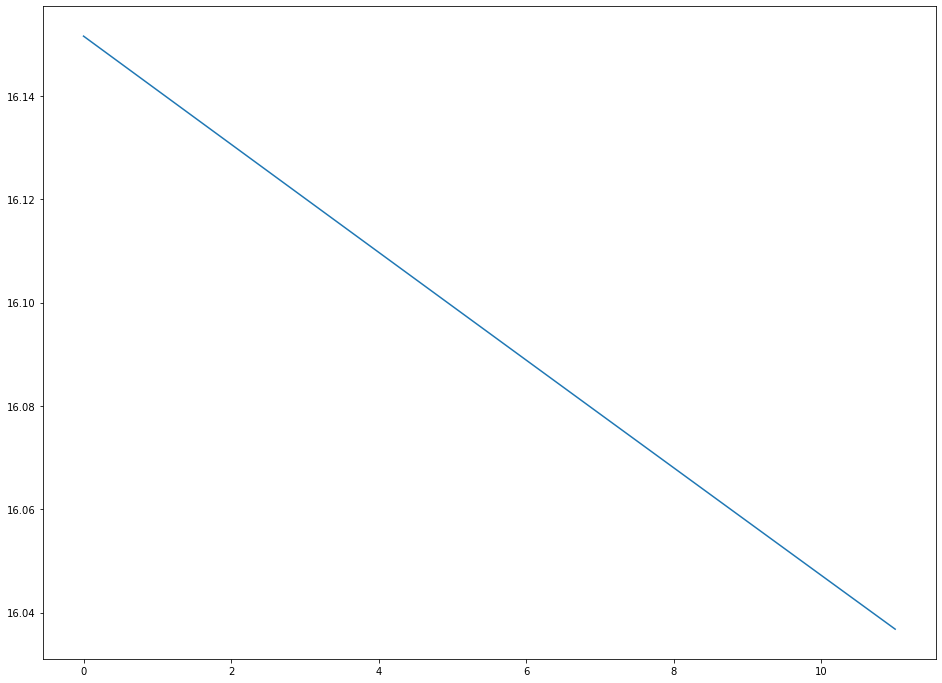

In [140]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

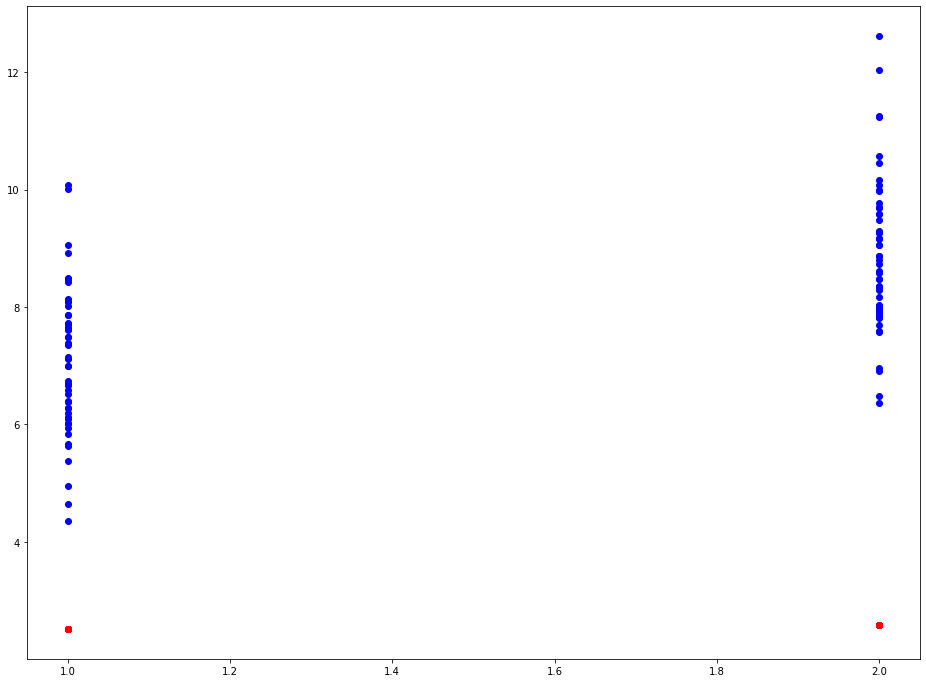

In [141]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [126]:
def gradient(x, y, theta):
    a,b = theta[0], theta[1]
    temp_err = a * x + b - y
    loss = sum(temp_err * temp_err)
    grad_a = sum(x * temp_err)
    grad_b = sum(temp_err)
    return np.array([grad_a, grad_b]), loss


def plot_all_results(grad_store, abvalue_store, loss_store, velocity_store = None):
    plt.figure(figsize = [20, 12])
    plt.subplot(231)
    plt.plot(grad_store[:,0])
    plt.title('Gradient of loss wrt a'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial a}$')
    plt.subplot(232)
    plt.plot(grad_store[:,1])
    plt.title('Gradient of loss wrt b'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial b}$')
    plt.subplot(233)
    plt.plot(abvalue_store[:,0])
    plt.title('"a" values'); plt.xlabel("# Steps")
    plt.ylabel('a')
    plt.subplot(234)
    plt.plot(abvalue_store[:,1])
    plt.title('"b" values'); plt.xlabel("# Steps")
    plt.ylabel('b')
    plt.subplot(235)
    plt.plot(loss_store)
    plt.title("Loss"); plt.xlabel("# Steps")
    plt.ylabel('loss')
    if velocity_store is not None:
        plt.subplot(236)
        plt.plot(velocity_store[:, 0])
        plt.plot(velocity_store[:, 1], 'r*')
        plt.legend(['Velocity of grad_a', 'Velocity of grad_b'])

def init_data_store(num_epochs):
    grad_store = np.zeros([num_epochs, 2], dtype=float)
    abvalue_store = np.zeros([num_epochs, 2], dtype=float)
    loss_store = np.zeros([num_epochs, 1], dtype=float)
    velocity_store = np.zeros([num_epochs, 2], dtype=float)
    
    return grad_store, abvalue_store, loss_store, velocity_store

ix = np.arange(0,x.shape[0])
np.random.shuffle(ix)
x = x[ix]
y = y[ix]

def get_data_from_batch(x,y,idx,batch_size):
    start_ix = idx*batch_size
    end_ix   = min(start_ix + batch_size, x.shape[0])
    return (x[start_ix:end_ix], y[start_ix:end_ix])

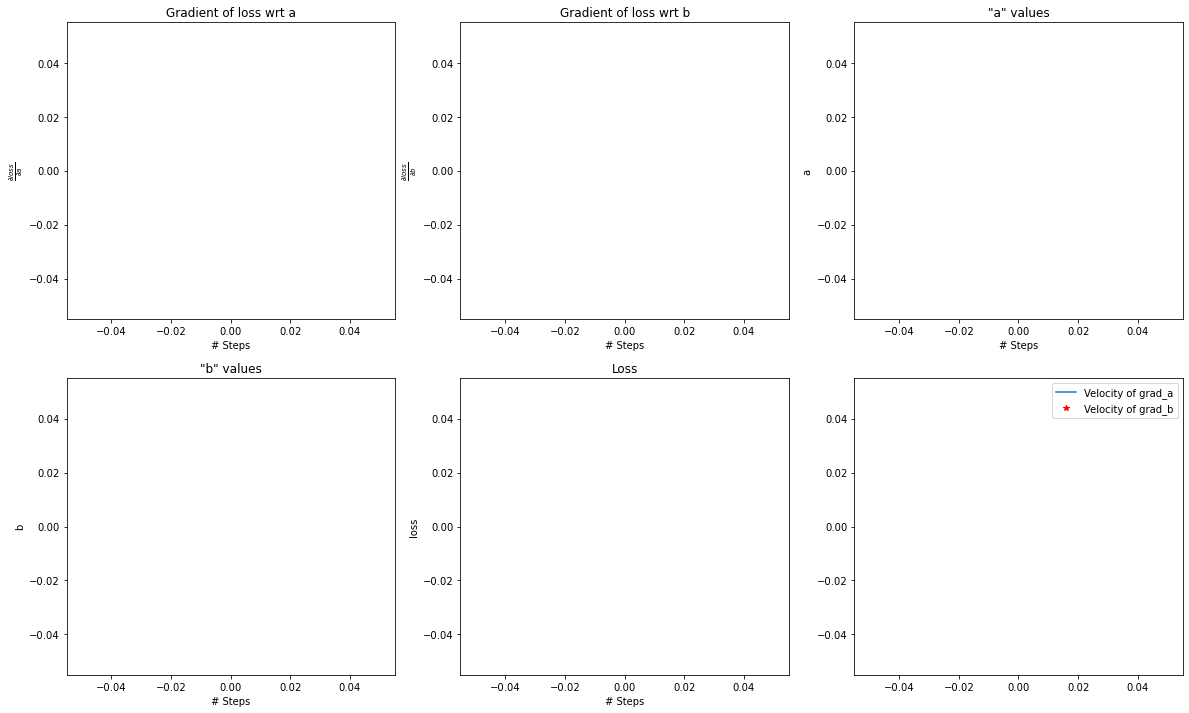

In [127]:
initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
gamma = 0.9

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        velocity_store[i] = velocity
        
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        # computing gradient at lookahead theta
        look_ahead_theta = theta - gamma*velocity
        grad, loss = gradient(x_batch, y_batch, look_ahead_theta)
        
        # update the params
        velocity = gamma* velocity + eta * grad
        theta = theta - velocity
        
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store, velocity_store)

#### метод нестерова

In [32]:
def nesterov_accelarated_gradient(c_f, f):
    print("f(x) = ",c_f)
    f_dash = diff(c_f,x)
    print ("df(x)/dx = " , f_dash)
    a = float(input("Введите начальное значение: "))
    x0=a
    n = float(input("Введите скорость обучения: "))
    g = float(input("Введите константу: "))
    err = float(input("Введите допуск ошибки: "))
    print ("Начальный градиент Нестерова")
    print ("x0 = ",a)
    print ("f(x0) = ",f(a))
    iter_count = 0
    xk=x0
    v0=0
    while (True):
        iter_count = iter_count + 1
        #print "Iteration No. ", iter_count, ": "
        fk_dash= (lambdify(x , f_dash , "numpy"))(xk - g*v0)
        vk = g*v0 + n*fk_dash
        xk = xk - vk
        #print "x"+str(iter_count)+" = ",xk
        #print "f(x"+str(iter_count)+") = ",f(xk)
        if abs(N(xk-x0)) < float(err):
            break
        x0 = xk
        v0 = vk
    print ("Количество итераций = ",iter_count)
    print ("Минимальное = ",xk)
    print ("Минимальное значение функции= ",f(xk))

In [33]:
from sympy import *
x = Symbol('x')
cost_function = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
c_f=sympify(cost_function)
f = lambdify(x, c_f, "numpy")

In [34]:
nesterov_accelarated_gradient(c_f, f)

f(x) =  6.19100812215378e+15
df(x)/dx =  0
Введите начальное значение: 10
Введите скорость обучения: 0.01
Введите константу: 2
Введите допуск ошибки: 1
Начальный градиент Нестерова
x0 =  10.0
f(x0) =  6191008122153780.0
Количество итераций =  1
Минимальное =  10.0
Минимальное значение функции=  6191008122153780.0


#### Метод rmsprop

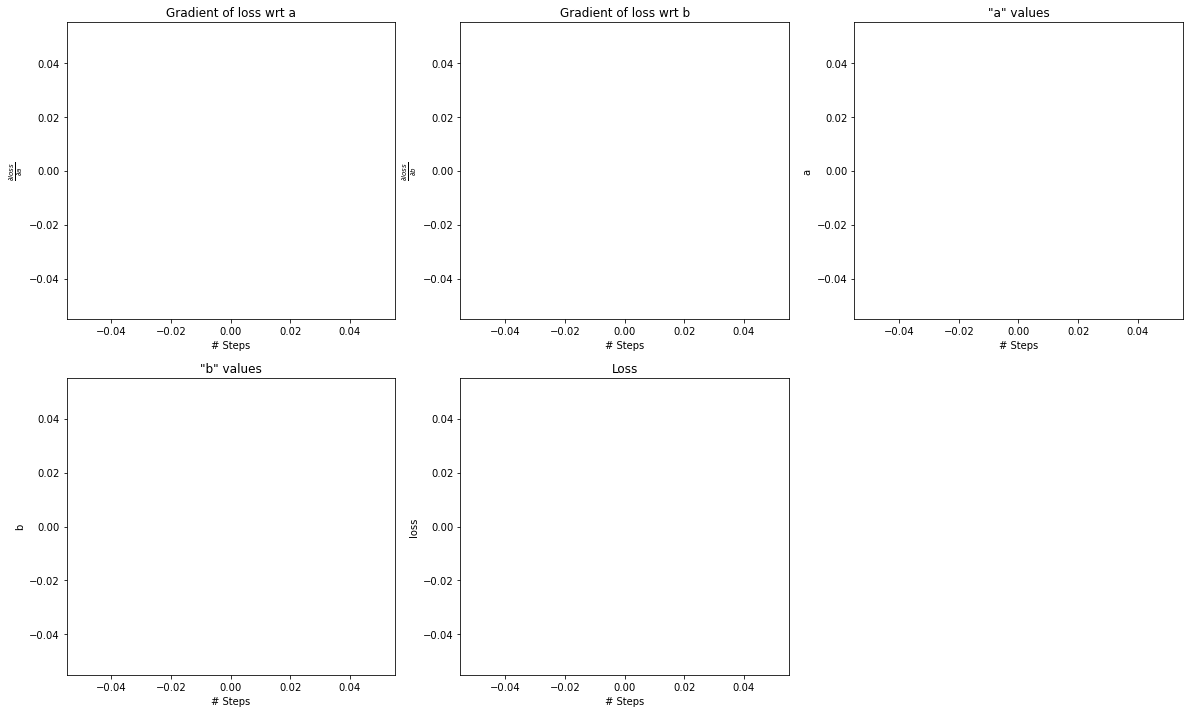

In [128]:
initial_b = 75
num_epochs = 500
eta = 8e-2
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
eps = 1e-8
gamma = 0.999

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
i=0
expected_grad = np.array([0,0])
for epoch in range(num_epochs):   
    
    for batch_idx in range(n_batches):
        
        abvalue_store[i] = theta
        
        # get the data and compute gradient 
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # compute update rule
        expected_grad = gamma * expected_grad + (1 - gamma) * np.square(grad)
        RMS_grad = np.sqrt(expected_grad + eps)
        delta_theta = -(eta/RMS_grad) * grad
        
        theta = theta + delta_theta
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)